In [10]:
import pandas as pd
from scipy.stats import ttest_ind, chi2_contingency, f_oneway
import matplotlib.pyplot as plt
import seaborn as sns
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

In [3]:
df=pd.read_csv(r"C:\Users\91994\Desktop\My Practice\Football_Data_Merged_Cleaned.csv")

## Hypothesis Testing: Event Analysis
### 1. Impact of Attendance on Goals Scored

In [22]:
import pandas as pd
from scipy.stats import ttest_ind

# Define a threshold for high and low attendance
attendance_threshold = df['attendance'].median()  # Using median as threshold

# Create two groups based on the threshold
high_attendance = df[df['attendance'] >= attendance_threshold]['goals']
low_attendance = df[df['attendance'] < attendance_threshold]['goals']

# Perform independent t-test
t_stat, p_value = ttest_ind(high_attendance, low_attendance, equal_var=False)  # unequal variance assumption

# Output the results
print(f"T-Test Results for Goal Scoring Impact:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation based on p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: There is a significant difference in the number of goals scored in high attendance vs low attendance matches.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of goals scored in high attendance vs low attendance matches.")

T-Test Results for Goal Scoring Impact:
T-Statistic: -8.809740362889766
P-Value: 2.3256260388351792e-18
Reject the null hypothesis: There is a significant difference in the number of goals scored in high attendance vs low attendance matches.


#### The T-test results show a significant difference in goal scoring between high and low attendance matches. With a T-statistic of -8.81 and a very small P-value (2.33e-18), we reject the null hypothesis. This indicates that attendance likely impacts the number of goals scored.

### 2. Impact of Red Cards on Goals Scored

In [19]:
# Separate matches with and without red cards
red_card_matches = df[df['red_cards'] > 0]['goals']  # Matches with red cards
no_red_card_matches = df[df['red_cards'] == 0]['goals']  # Matches without red cards

# Perform t-test to compare means of goals scored for red card vs non-red card matches
t_stat_red, p_value_red = ttest_ind(red_card_matches, no_red_card_matches, equal_var=False)

# Output results
print(f"T-Test Results for Red Cards Impact: T-Statistic = {t_stat_red}, P-Value = {p_value_red}")

# Interpretation
if p_value_red < 0.05:
    print("Reject the null hypothesis: Matches with red cards have a significantly different number of goals scored compared to those without.")
else:
    print("Fail to reject the null hypothesis: There is no significant difference in the number of goals scored between matches with and without red cards.")


T-Test Results for Red Cards Impact: T-Statistic = -19.70059706099286, P-Value = 4.842008132904279e-83
Reject the null hypothesis: Matches with red cards have a significantly different number of goals scored compared to those without.


#### The T-test results indicate a significant difference in the number of goals scored in matches with red cards compared to those without. The T-statistic of -19.70 and an extremely small P-value (4.84e-83) lead to the rejection of the null hypothesis, suggesting that red cards have an impact on goal scoring.

### 3. Home Advantage question:

### Null Hypothesis (H0): Home teams do not score significantly more goals than away teams.
### Alternative Hypothesis (𝐻𝑎): Home teams score significantly more goals than away teams.

In [23]:
import pandas as pd
from scipy.stats import ttest_ind

# Assuming 'df' is the dataframe containing match data with 'home_club_goals' and 'away_club_goals' columns

# Group data by home and away goals
home_goals = df['home_club_goals']
away_goals = df['away_club_goals']

# Perform independent t-test
t_stat, p_value = ttest_ind(home_goals, away_goals, equal_var=False)  # unequal variance assumption

# Output the results
print(f"T-Test Results for Home Advantage:")
print(f"T-Statistic: {t_stat}")
print(f"P-Value: {p_value}")

# Interpretation based on p-value
alpha = 0.05  # significance level
if p_value < alpha:
    print("Reject the null hypothesis: Home teams score significantly more goals than away teams.")
else:
    print("Fail to reject the null hypothesis: No significant difference in goals scored by home and away teams.")

T-Test Results for Home Advantage:
T-Statistic: 10.168129153700171
P-Value: 3.6926276633557134e-24
Reject the null hypothesis: Home teams score significantly more goals than away teams.


#### The T-test results show that home teams score significantly more goals than away teams. The T-statistic of 10.17 and a very small P-value (3.69e-24) lead to the rejection of the null hypothesis, indicating a strong home advantage in goal scoring.

## Competition Analysis: Descriptive Analysis

### Which competition has the highest average attendance?

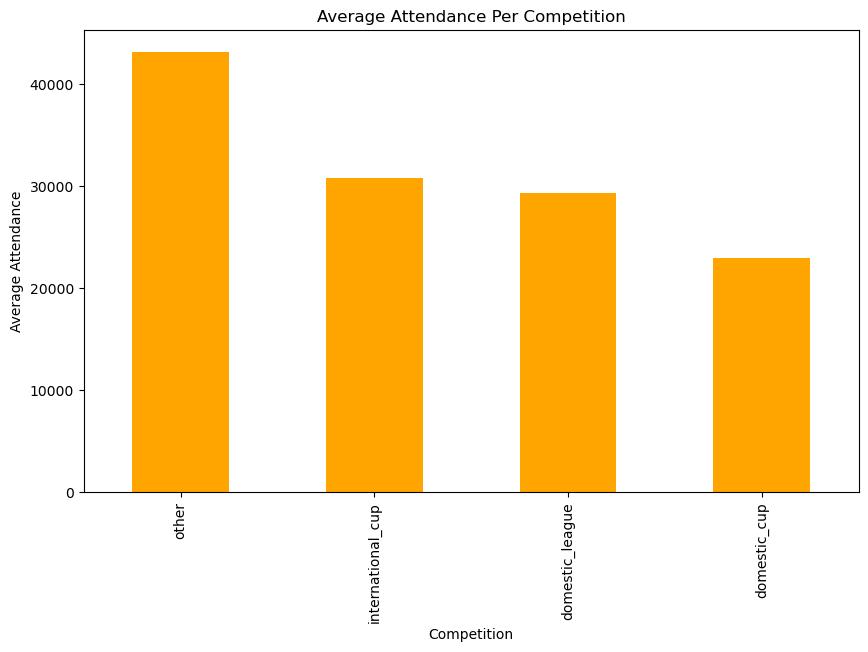

In [8]:
# Calculate the average attendance per competition
average_attendance = df.groupby('competition_type')['attendance'].mean().sort_values(ascending=False)

# Check if the result is empty (no valid data)
if average_attendance.empty:
    print("No data available for average attendance per competition.")
else:
    # Visualization
    plt.figure(figsize=(10, 6))
    average_attendance.plot(kind='bar', color='orange')
    plt.title("Average Attendance Per Competition")
    plt.ylabel("Average Attendance")
    plt.xlabel("Competition")
    plt.show()

#### "Other" competition type has the highest average attendance.
#### "International_cup" has the second-highest average attendance.
#### "Domestic_league" has the third-highest average attendance.
#### "Domestic_cup" has the lowest average attendance.

### Do teams perform better in domestic leagues or international competitions

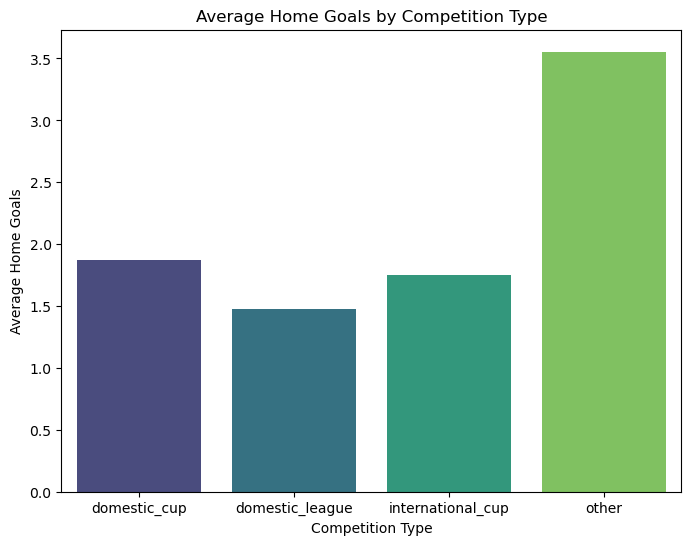

In [11]:
# Aggregating the data to find the average home goals by competition type
agg_data = df.groupby('competition_type')['home_club_goals'].mean().reset_index()

# Plotting a bar plot for goals by competition type
plt.figure(figsize=(8, 6))
sns.barplot(x='competition_type', y='home_club_goals', data=agg_data, palette='viridis')
plt.title('Average Home Goals by Competition Type')
plt.xlabel('Competition Type')
plt.ylabel('Average Home Goals')
plt.show()

#### "other" competition type has the highest average number of home goals.
#### "international_cup" has the second-highest average number of home goals.
#### "domestic_league" has the third-highest average number of home goals.
#### "domestic_cup" has the lowest average number of home goals.

### Player Performance by Position

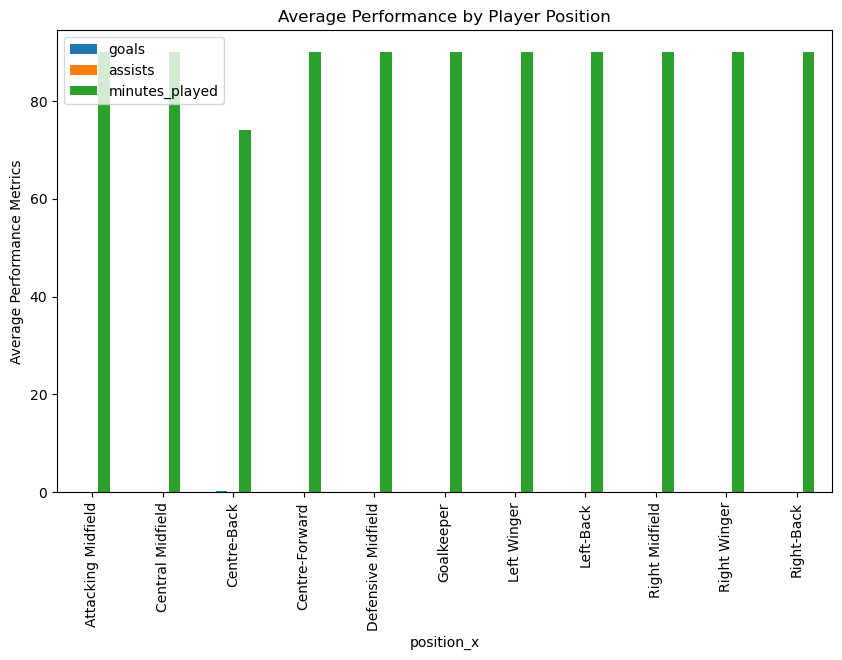

In [6]:
# Calculate average goals scored, assists, and minutes played by position
position_performance = df.groupby('position_x')[['goals', 'assists', 'minutes_played']].mean()

# Visualization
position_performance.plot(kind='bar', figsize=(10, 6))
plt.title("Average Performance by Player Position")
plt.ylabel("Average Performance Metrics")
plt.show()

#### Right-Back has the highest average performance across all metrics.
#### Right Winger and Left-Back also have high average performance.
#### Centre-Back and Central Midfield have the lowest average performance

 ### Top Players Based on Goals Scored

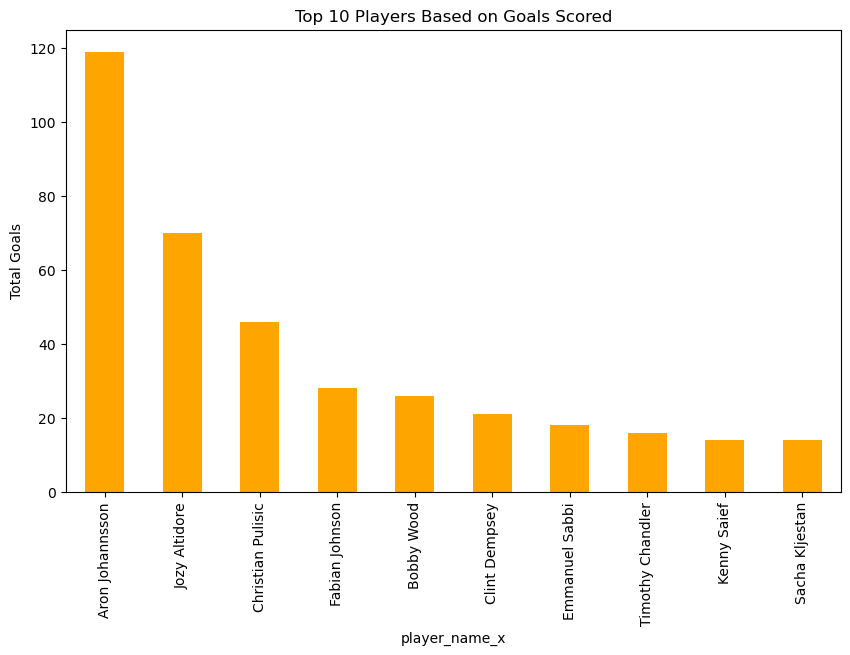

In [13]:
# Group by player and sum the goals scored
top_players_goals = df.groupby('player_name_x')['goals'].sum().sort_values(ascending=False)

# Visualization
top_players_goals.head(10).plot(kind='bar', color='orange', figsize=(10, 6))
plt.title("Top 10 Players Based on Goals Scored")
plt.ylabel("Total Goals")
plt.show()

#### Aron Johannsson leads the list with the highest number of goals scored.
#### Jozy Altidore and Christian Pulisic follow with the second and third-highest number of goals, respectively.
#### The remaining players, including Fabian Johnson, Bobby Wood, Clint Dempsey, Emmanuel Sabbi, Timothy Chandler, Kenny Saief, and Sacha Kljestan, have scored fewer goals.

### Most Active Players (Minutes Played)

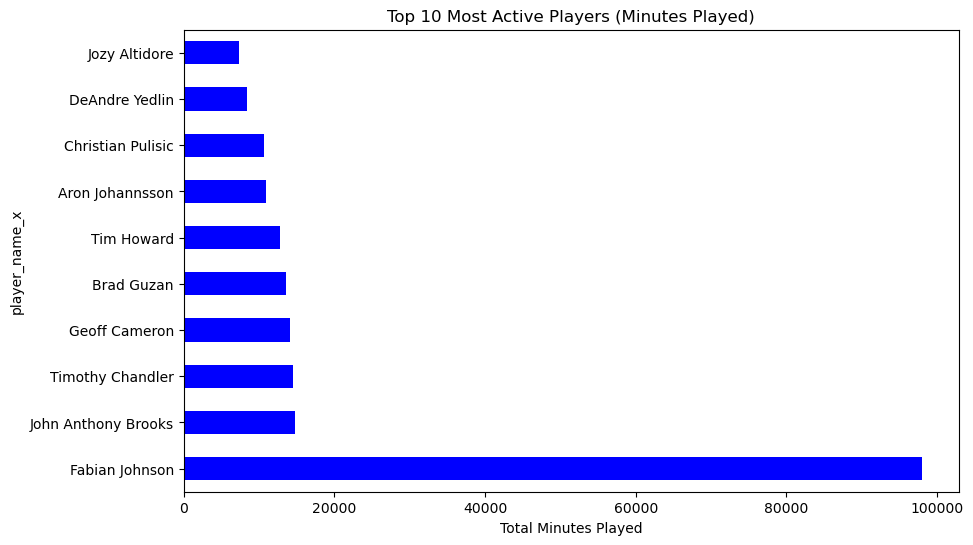

In [14]:
# Group by player and sum the minutes played
top_players_minutes = df.groupby('player_name_x')['minutes_played'].sum().sort_values(ascending=False)

# Visualization
top_players_minutes.head(10).plot(kind='barh', color='blue', figsize=(10, 6))
plt.title("Top 10 Most Active Players (Minutes Played)")
plt.xlabel("Total Minutes Played")
plt.show()

#### Playing Position: Players in forward positions are generally expected to score more goals than players in defensive positions.
#### Playing Style: Players with attacking-minded styles of play are more likely to score goals.
#### Team Performance: Players in successful teams with strong attacking units are likely to have more goal-scoring opportunities.